In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import math
from domain import (
    H_eps,
    H_eps_derivative,
    EPS,
    gradient_descent,
    grad_phi_part,
    grad_w_part,
    get_frontier_phi,
)
from scipy.ndimage.interpolation import shift
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from segmenter import Segmenter

<IPython.core.display.Javascript object>

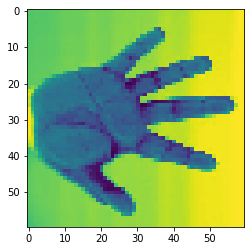

<IPython.core.display.Javascript object>

In [8]:
from PIL import Image

img = Image.open("../data/test/src_hand.jpg").convert("L")
img = img.resize((70, 70))
img = np.array(img)
img = (img-np.mean(img))/np.std(img)
plt.imshow(img)


In [9]:
optimiser_param = {
    "u": img,
    "step_w": 0.01,
    "step_phi": 10,
    "eps": 1,
    "lambda_": 1,
    "mu": 1,
    "it": 5,
    "verbose": True,
    "mode": "standard",
}

<IPython.core.display.Javascript object>

In [10]:
segmenter = Segmenter(optimiser_param)

<IPython.core.display.Javascript object>

In [11]:
segmenter.segment()

itération 0/5
itération 0 : w gradient: 57.1818249608347
itération 0 : phi gradient: 23916.91719565574
itération 1/5
itération 1 : w gradient: 59.67601413336606
itération 1 : phi gradient: 804.6383174311867
itération 2/5
itération 2 : w gradient: 60.98996353427686
itération 2 : phi gradient: 93.1229512740462
itération 3/5
itération 3 : w gradient: 62.220353604814306
itération 3 : phi gradient: 0.005617417716316053
itération 4/5
itération 4 : w gradient: 63.52118325585111
itération 4 : phi gradient: 0.028233856591571842


<IPython.core.display.Javascript object>

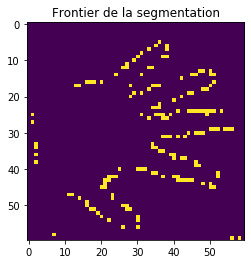

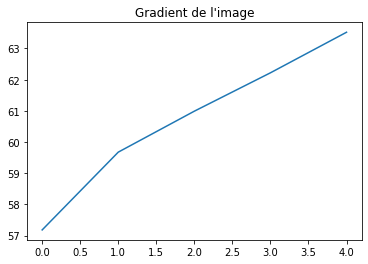

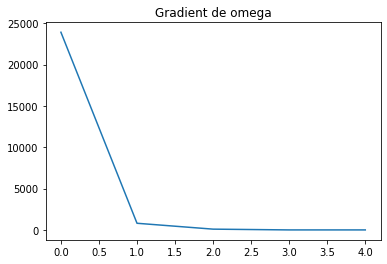

<IPython.core.display.Javascript object>

In [14]:
segmenter.plot_frontier()